#### This is the implementation of cybercrime profile research paper on dummy dataset created by Bijay Adhikari

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('cyber-profile.csv')
data.head()

,skill,well_networked,bully,impatient/vengeful,passionate,non-social_intelligence,identity_crisis,financial_need,beliefs(political/religious/other),experimentation,outcome
0,professional,yes,yes,yes,yes,yes,no,yes,no,yes,suspect
1,professional,no,yes,no,no,yes,no,no,no,yes,not-suspect
2,professional,no,yes,no,yes,yes,yes,no,yes,yes,suspect
3,semi,no,no,yes,yes,yes,no,yes,yes,no,suspect
4,Not,yes,no,no,no,no,no,yes,yes,yes,not-suspect


In [3]:
data.dtypes

skill                                 object
well_networked                        object
bully                                 object
impatient/vengeful                    object
passionate                            object
non-social_intelligence               object
identity_crisis                       object
financial_need                        object
beliefs(political/religious/other)    object
experimentation                       object
outcome                               object
dtype: object

###### since the data is categorical we will replace it into numeric values

In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#for skill column
data['skill'] = label_encoder.fit_transform(data['skill'])
#for well networked column
data['well_networked'] = label_encoder.fit_transform(data['well_networked'])
#for bully column
data['bully'] = label_encoder.fit_transform(data['bully'])
#for impatient/vengeful column
data['impatient/vengeful'] = label_encoder.fit_transform(data['impatient/vengeful'])
#for passionate column
data['passionate'] = label_encoder.fit_transform(data['passionate'])
#for non-social_intelligence column
data['non-social_intelligence'] = label_encoder.fit_transform(data['non-social_intelligence'])
#for identity_crisis column
data['identity_crisis'] = label_encoder.fit_transform(data['identity_crisis'])
#for financial_need column
data['financial_need'] = label_encoder.fit_transform(data['financial_need'])
#for beliefs(political/religious/other) column
data['beliefs(political/religious/other)'] = label_encoder.fit_transform(data['beliefs(political/religious/other)'])
#for experimentation column
data['experimentation'] = label_encoder.fit_transform(data['experimentation'])
#for outcome column
data['outcome'] = label_encoder.fit_transform(data['outcome'])

data.head()

,skill,well_networked,bully,impatient/vengeful,passionate,non-social_intelligence,identity_crisis,financial_need,beliefs(political/religious/other),experimentation,outcome
0,1,1,1,1,1,1,0,1,0,1,1
1,1,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,1,1,1,0,1,1,1
3,2,0,0,1,1,1,0,1,1,0,1
4,0,1,0,0,0,0,0,1,1,1,0


In [29]:
data.describe()

,skill,well_networked,bully,impatient/vengeful,passionate,non-social_intelligence,identity_crisis,financial_need,beliefs(political/religious/other),experimentation,outcome
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.979798,0.515152,0.565657,0.494949,0.484848,0.555556,0.484848,0.555556,0.585859,0.565657,0.585859
std,0.807867,0.502314,0.498193,0.502519,0.502314,0.499433,0.502314,0.499433,0.495080,0.498193,0.495080
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
75%,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


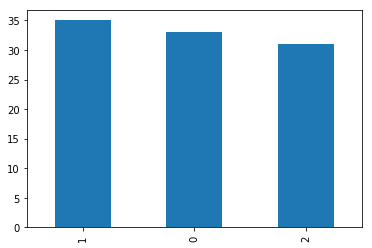

In [31]:
data.skill.value_counts().plot(kind='bar')

###### lookslike values are equally distributed

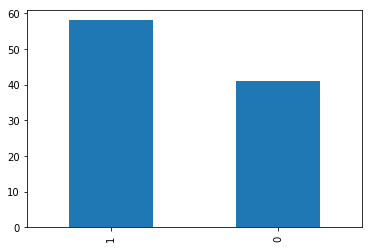

In [32]:
data.outcome.value_counts().plot(kind='bar')

##### there are more no of suspects than unsupected people in survey of just 100 people based on their behavior

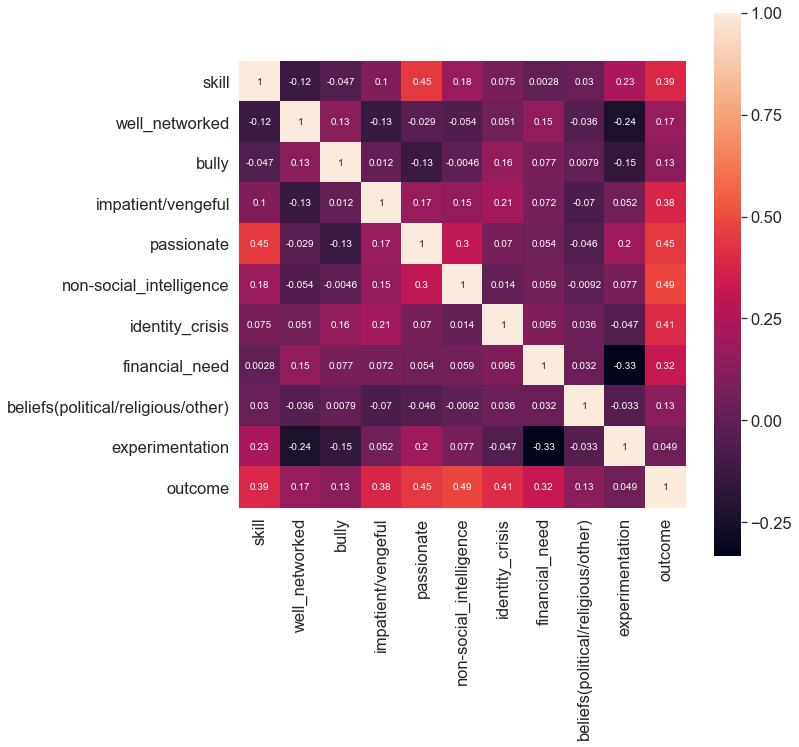

In [34]:

fig = plt.subplots(figsize = (10,10))
sns.set(font_scale=1.5)
sns.heatmap(data.corr(),square = True,cbar=True,annot=True,annot_kws={'size': 10})
plt.show()

###### We can collect mant insights frm the diagram like the output (outcome) is more corelated with skill, passionate about cyber, non-social behavior, financial needs and impatient or vengeful type of person

###### Very less people are suspected from experimentation alone

In [8]:
#Extracting Independent and dependent Variable  
x= data.iloc[:, :10].values  
y= data.iloc[:, 10].values  

In [10]:
x.shape

(99, 10)

In [11]:
y.shape

(99,)

In [12]:
# Splitting the dataset into training and test set.  
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.20, random_state=0)  

In [14]:
x_train.shape

(79, 10)

In [15]:
x_test.shape

(20, 10)

In [16]:
y_train.shape

(79,)

In [17]:
y_test.shape

(20,)

In [18]:
#Fitting Logistic Regression to the training set  
from sklearn.linear_model import LogisticRegression  
classifier= LogisticRegression(random_state=0)  
classifier.fit(x_train, y_train)  

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [19]:
#Predicting the test set result  
y_pred= classifier.predict(x_test)  

In [20]:
y_pred

array([0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

In [22]:
#Creating the Confusion matrix  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred)  

In [23]:
cm

array([[7, 4],
       [1, 8]], dtype=int64)

In [30]:
print('Accuracy of Logistic regression classifier on training set: {:.2f}'
     .format(classifier.score(x_train, y_train)))
print('Accuracy of Logistic regression classifier on test set: {:.2f}'
     .format(classifier.score(x_test, y_test)))

Accuracy of Logistic regression classifier on training set: 0.90
Accuracy of Logistic regression classifier on test set: 0.75


In [35]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve

In [36]:
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

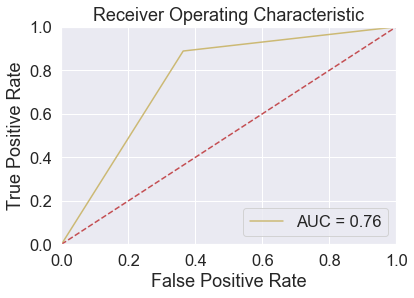

In [37]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'y', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [38]:
precision_score(y_test, y_pred)

0.6666666666666666

As a quick reminder, precision measures true positives over true positives plus false positives.

In [39]:
recall_score(y_test, y_pred)

0.8888888888888888

Recall measures true positives over true positives plus false negatives.

In [40]:
f1_score(y_test, y_pred)

0.761904761904762

The F1 score combines precision and recall using the harmonic mean.